In [6]:
import matplotlib.pyplot as plt
import numpy as np


In [7]:
from sklearn import datasets
digits = datasets.load_digits()

In [8]:
pixels = digits.data
target = digits.target
images = digits.images

In [9]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(images[i+j], cmap='binary')
        plt.title(target[i+j])
        plt.axis('off')
    plt.show()

In [10]:
def plot_digit(digito):
    # plot 5 times the same number
    fig = plt.figure(figsize=(15,15))
    count = 1
    for i in range(len(target)):
        if target[i] == digito:
            plt.subplot(1,5,count)
            plt.imshow(images[i], cmap='binary')
            plt.title(target[i])
            plt.axis('off')
            count += 1
        if count > 5:
            break
    plt.show()

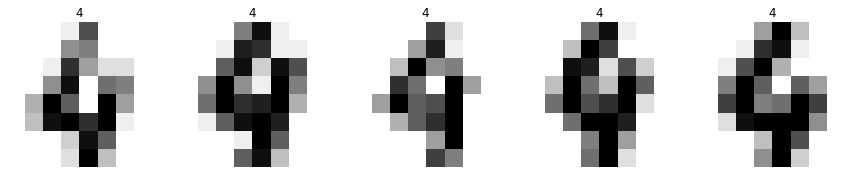

In [11]:
plot_digit(4)

In [12]:
print(images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [13]:
def plot_digit(digito):
    # plot 5 times the same number
    fig = plt.figure(figsize=(15,15))
    count = 1
    for i in range(len(target)):
        if target[i] == digito:
            plt.subplot(1,5,count)
            plt.imshow(images[i], cmap='binary')
            plt.title(target[i])
            plt.axis('off')
            count += 1
        if count > 5:
            break
    plt.show()

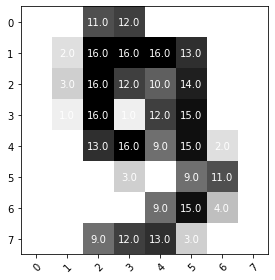

In [14]:
vegetables = np.arange(8)
farmers = np.arange(8)

harvest = images[9]


fig, ax = plt.subplots()
im = ax.imshow(harvest, cmap='binary')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

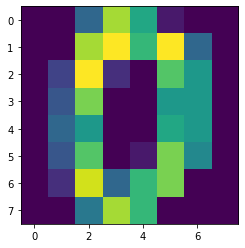

In [15]:
plt.imshow(images[0], interpolation='nearest')
plt.show()

In [16]:
from IPython.display import display, Math

def print_matrix(array):
    data = ''
    for line in array:        
        if len(line) == 1:
            data += ' %.3f &'%line + r' \\\n'
            continue
        for element in line:
            data += ' %.3f &'%element
        data += r' \\' + '\n'
    print('\\begin{bmatrix} \n%s\end{bmatrix}'%data)
    display(Math('\\begin{bmatrix} \n%s\end{bmatrix}'%data))

In [17]:
import pandas as pd

In [18]:
data = []
for i in range(len(pixels)):
    x = pixels[i]
    z = np.append(x,target[i])
    data.append(z)

In [20]:
features = []
for i in range(64):
    features.append(f'pixel {i}')
features.append(f'digit')

In [21]:
table = pd.DataFrame(data=data, columns=features)

In [22]:
table.shape

(1797, 65)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(table.iloc[:,:-1], table.iloc[:,-1], test_size=0.33, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
models_numbers_of_trees = [
    RandomForestClassifier(n_estimators=i) for i in np.arange(10,110,10)
]

In [63]:
classifiers_numbers_of_trees = [clf.fit(X_train, y_train) for clf in models_numbers_of_trees]

In [64]:
predictions_numbers_of_trees = [clf.predict(X_test) for clf in classifiers_numbers_of_trees]

In [30]:
from sklearn import metrics

In [40]:
acertividade = []
for i in range(len(list(predictions_numbers_of_trees))):
    print(f'model {i}')
    alpha = metrics.accuracy_score(y_test, predictions_numbers_of_trees[i])
    acertividade.append(alpha)
    print(alpha)

model 0
0.9326599326599326
model 1
0.9612794612794613
model 2
0.9730639730639731
model 3
0.9730639730639731
model 4
0.9696969696969697
model 5
0.9764309764309764
model 6
0.9747474747474747
model 7
0.9730639730639731
model 8
0.9730639730639731
model 9
0.9747474747474747


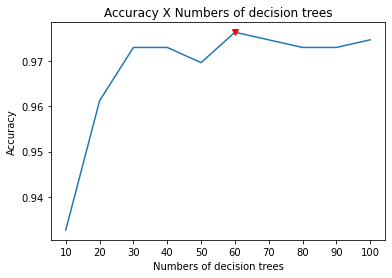

In [59]:
x_axis = range(10,110,10)
mark = [x_axis.index(60)]

plt.plot(x_axis,acertividade,markevery=mark, marker="v",markerfacecolor='red',
                           markerfacecoloralt='red',
                           markeredgecolor='red')
plt.title('Accuracy X Numbers of decision trees')
plt.xlabel('Numbers of decision trees')
plt.ylabel('Accuracy')
plt.xticks(x_axis,x_axis)
plt.savefig('accuracy_num_trees.png', dpi=300)
plt.show()

In [60]:
# a =  RandomForestClassifier(n_estimators=1000)
# a.fit(X_train, y_train)
# b = a.predict(X_test)
# metrics.accuracy_score(y_test, b)

0.9747474747474747

In [65]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
models_deepth = [
    RandomForestClassifier(max_depth=i) for i in max_depth
]
classifiers_deepth = [clf.fit(X_train, y_train) for clf in models_deepth]
predictions_deepth = [clf.predict(X_test) for clf in classifiers_deepth]


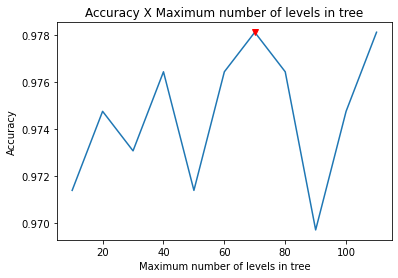

In [76]:
# acertividade_profundidade = []
# for i in range(len(list(predictions_deepth))):
#     print(f'model {i}')
#     alpha = metrics.accuracy_score(y_test, predictions_deepth[i])
#     acertividade_profundidade.append(alpha)
#     print(alpha)

mark = [acertividade.index(max(acertividade))+1]

plt.plot(max_depth,acertividade_profundidade,markevery=mark, marker="v",markerfacecolor='red',
                           markerfacecoloralt='red',
                           markeredgecolor='red')
plt.title('Accuracy X Maximum number of levels in tree')
plt.xlabel('Maximum number of levels in tree')
plt.ylabel('Accuracy')
#plt.xticks(max_depth,max_depth)
plt.savefig('accuracy_deepth.png', dpi=300)
plt.show()

model 0
0.9747474747474747
model 1
0.9730639730639731
model 2
0.9663299663299664


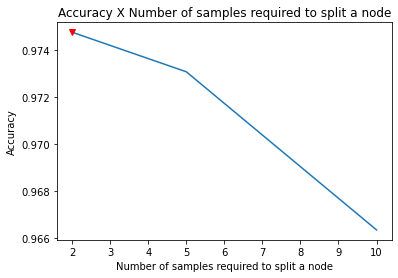

In [85]:
min_samples_split = [2, 5, 10]
models_samples_split = [
    RandomForestClassifier(min_samples_split=i) for i in min_samples_split
]
classifiers_samples_split = [clf.fit(X_train, y_train) for clf in models_samples_split]
predictions_samples_split = [clf.predict(X_test) for clf in classifiers_samples_split]

acertividade_samples_split = []
for i in range(len(list(predictions_samples_split))):
    print(f'model {i}')
    alpha = metrics.accuracy_score(y_test, predictions_samples_split[i])
    acertividade_samples_split.append(alpha)
    print(alpha)

mark = [acertividade_samples_split.index(max(acertividade_samples_split))]

plt.plot(min_samples_split,acertividade_samples_split,markevery=mark, marker="v",markerfacecolor='red',
                           markerfacecoloralt='red',
                           markeredgecolor='red')
plt.title('Accuracy X Number of samples required to split a node')
plt.xlabel('Number of samples required to split a node')
plt.ylabel('Accuracy')
#plt.xticks(max_depth,max_depth)
plt.savefig('accuracy_samples_split.png', dpi=300)
plt.show()


model 0
0.9781144781144782
model 1
0.968013468013468
model 2
0.9595959595959596


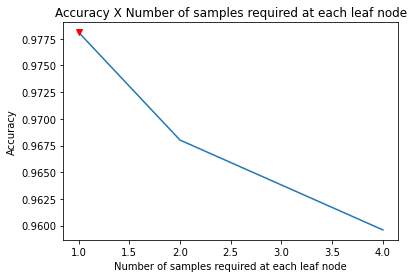

In [86]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
models_samples_leaf = [
    RandomForestClassifier(min_samples_leaf=i) for i in min_samples_leaf
]
classifiers_samples_leaf = [clf.fit(X_train, y_train) for clf in models_samples_leaf]
predictions_samples_leaf = [clf.predict(X_test) for clf in classifiers_samples_leaf]

acertividade_samples_leaf = []
for i in range(len(list(predictions_samples_leaf))):
    print(f'model {i}')
    alpha = metrics.accuracy_score(y_test, predictions_samples_leaf[i])
    acertividade_samples_leaf.append(alpha)
    print(alpha)

mark = [acertividade_samples_leaf.index(max(acertividade_samples_leaf))]

plt.plot(min_samples_leaf,acertividade_samples_leaf,markevery=mark, marker="v",markerfacecolor='red',
                           markerfacecoloralt='red',
                           markeredgecolor='red')
plt.title('Accuracy X Number of samples required at each leaf node')
plt.xlabel('Number of samples required at each leaf node')
plt.ylabel('Accuracy')
#plt.xticks(max_depth,max_depth)
plt.savefig('accuracy_samples_leaf.png', dpi=300)
plt.show()

In [114]:
best_model_grid

{'n_estimators': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'max_depth': 70}

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
n_estimators = range(10,110,10)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

In [103]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [107]:
# getting the best individual params
best_model_grid

{'n_estimators': 60,
 'max_deepth': 70,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [109]:
cv_random_model = RandomForestClassifier(**rf_random.best_params_)
cv_random_model.fit(X_train, y_train)
cv_random_model_predict = cv_random_model.predict(X_test)

In [115]:
best_model = RandomForestClassifier(**best_model_grid)
best_model.fit(X_train, y_train)
best_model_predict = best_model.predict(X_test)

In [116]:
default_model = RandomForestClassifier()
default_model.fit(X_train,y_train)
default_model_predict = default_model.predict(X_test)

In [122]:
models_predicts = [cv_random_model_predict,best_model_predict,default_model_predict]
models_name = ['Default', 'Best Individually', 'Random CV Search']

acertividade_models = []
for i in models_predicts[::-1]:
    a = metrics.accuracy_score(y_test,i)
    acertividade_models.append(a)
    print(a)

0.9713804713804713
0.9747474747474747
0.9797979797979798


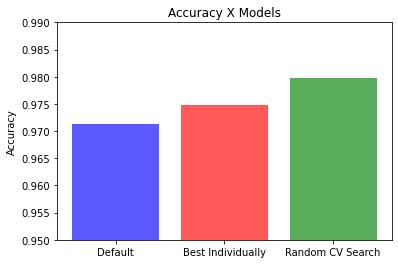

In [133]:
plt.bar(models_name, acertividade_models, color=['blue', 'red', 'green'], alpha = 0.65)
plt.title('Accuracy X Models')
plt.ylabel('Accuracy')
plt.ylim([0.95, 0.99])
plt.savefig('accuracy_per_model.png', dpi=300)
plt.show()

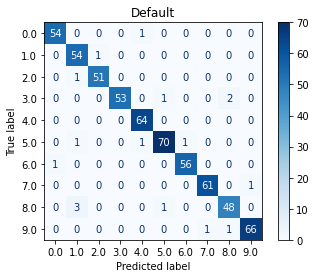

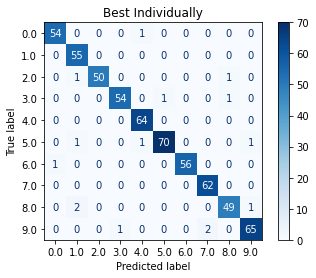

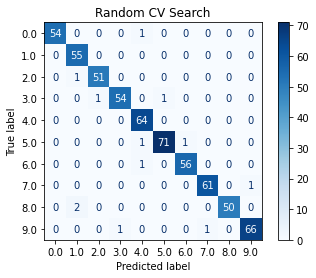

In [150]:
models_rf = [default_model, best_model, cv_random_model]

#('Multi-class Confusion Matrix\n')
for i in range(len(models_rf)):
    metrics.plot_confusion_matrix(models_rf[i], X_test, y_test, cmap='Blues')
    plt.title(models_name[i])
    plt.savefig(f'confusion_matrix_{i}.png', dpi=300)
plt.show()
